In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df=pd.read_csv('mall_customers.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [16]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


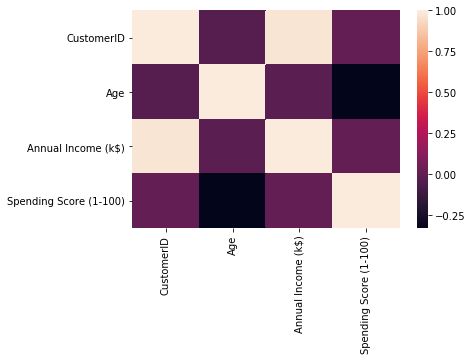

In [18]:
sns.heatmap(df.corr())

In [19]:
df.drop(['CustomerID', 'Genre', 'Age'], axis=1, inplace=True)

In [20]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


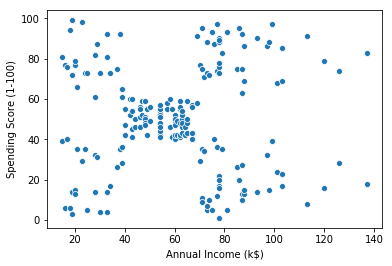

In [22]:
sns.scatterplot( x ='Annual Income (k$)', y='Spending Score (1-100)', data=df)

In [23]:
from sklearn.cluster import  KMeans

In [36]:
km = KMeans(n_clusters=2) # n_clusters=1,2,3,....

In [37]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
km.inertia_

181363.59595959596

In [39]:
km.cluster_centers_

array([[37.28888889, 50.28888889],
       [79.6       , 50.12727273]])

In [46]:
wcss =[]
for i in range(1,31):
    km = KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)
    



In [48]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30227.606513152015,
 25018.576334776335,
 21818.114588452183,
 19649.59658286696,
 17556.600879214166,
 16282.460877803984,
 15076.011726431463,
 13167.422577422578,
 11659.591589207894,
 11170.100915081088,
 10122.208847366084,
 9403.487063178367,
 8539.463357753357,
 8156.914715296782,
 7740.957135262399,
 7203.304807692308,
 6671.812665112666,
 6632.293390433097,
 6111.721942110178,
 5878.518048618049,
 5642.605661005661,
 5236.805844155844,
 4898.600700103991,
 4793.008069708069]

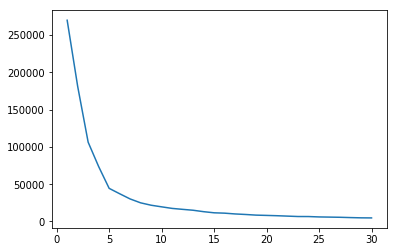

In [52]:
plt.plot(range(1,31), wcss)
plt.show()

In [53]:
km = KMeans(n_clusters=5)

In [58]:
km.fit_predict(df) 

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [55]:
km.inertia_

44448.45544793371

In [59]:
clusters=km.fit_predict(df)

In [60]:
df['clusters'] = clusters

In [61]:
df

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,3
1,15,81,2
2,16,6,3
3,16,77,2
4,17,40,3
5,17,76,2
6,18,6,3
7,18,94,2
8,19,3,3
9,19,72,2


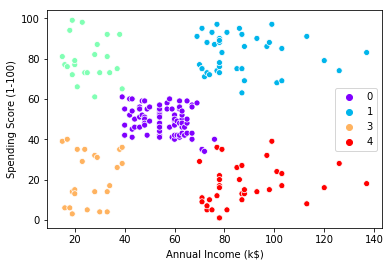

In [67]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data =df , hue=clusters, palette='rainbow')

In [68]:
dmap = {
     0 : 'medium AI, medium SS', 1:'high AI , high SS', 3:'low AI, low SS', 4:'high AI, low SS', 2:'low AI, high SS'
}

In [69]:
df['clusters'] = df['clusters'].map(dmap)

In [70]:
df

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,"low AI, low SS"
1,15,81,"low AI, high SS"
2,16,6,"low AI, low SS"
3,16,77,"low AI, high SS"
4,17,40,"low AI, low SS"
5,17,76,"low AI, high SS"
6,18,6,"low AI, low SS"
7,18,94,"low AI, high SS"
8,19,3,"low AI, low SS"
9,19,72,"low AI, high SS"
